In [4]:
from spn.structure.leaves.parametric.Parametric import Categorical

spn = 0.4 * (Categorical(p=[0.2, 0.8], scope=0) *
             (0.3 * (Categorical(p=[0.3, 0.7], scope=1) *
                     Categorical(p=[0.4, 0.6], scope=2))
            + 0.7 * (Categorical(p=[0.5, 0.5], scope=1) *
                     Categorical(p=[0.6, 0.4], scope=2)))) \
    + 0.6 * (Categorical(p=[0.2, 0.8], scope=0) *
             Categorical(p=[0.3, 0.7], scope=1) *
             Categorical(p=[0.4, 0.6], scope=2))


In [7]:
from spn.algorithms.Marginalization import marginalize

spn_marg = marginalize(spn, [1,2])

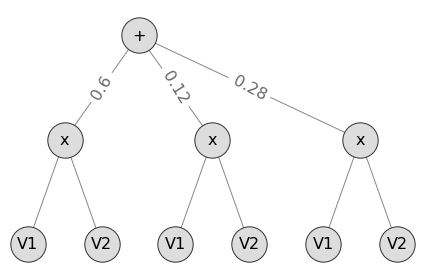

In [10]:
from spn.io.Graphics import plot_spn
plot_spn(spn_marg)

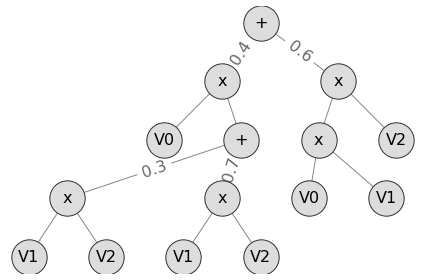

In [11]:
plot_spn(spn)

In [1]:
import numpy as np
test_data = np.array([1.0, 0.0, 1.0]).reshape(-1, 3)

In [5]:
from spn.algorithms.Inference import log_likelihood

ll = log_likelihood(spn, test_data)
print(ll, np.exp(ll))

[[-1.90730501]] [[0.14848]]


In [8]:
llm = log_likelihood(spn_marg, test_data)
print(llm, np.exp(llm))

[[-1.68416146]] [[0.1856]]


In [12]:
test_data2 = np.array([np.nan, 0.0, 1.0]).reshape(-1, 3)
llom =  log_likelihood(spn, test_data2)
print(llom, np.exp(llom))

[[-1.68416146]] [[0.1856]]


In [14]:
from numpy.random.mtrand import RandomState
from spn.algorithms.Sampling import sample_instances
print(sample_instances(spn, np.array([np.nan, np.nan, np.nan] * 5).reshape(-1, 3), RandomState(123)))

[[0. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 1.]
 [1. 1. 0.]]


In [15]:
from numpy.random.mtrand import RandomState
from spn.algorithms.Sampling import sample_instances
print(sample_instances(spn, np.array([np.nan, 0, 0] * 5).reshape(-1, 3), RandomState(123)))

[[0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [16]:
np.random.seed(123)
train_data = np.c_[np.r_[np.random.normal(5, 1, (500, 2)), np.random.normal(10, 1, (500, 2))],
                   np.r_[np.zeros((500, 1)), np.ones((500, 1))]]

In [17]:
from spn.algorithms.LearningWrappers import learn_parametric, learn_classifier
from spn.structure.leaves.parametric.Parametric import Categorical, Gaussian
from spn.structure.Base import Context
spn_classification = learn_classifier(train_data,
                       Context(parametric_types=[Gaussian, Gaussian, Categorical]).add_domains(train_data),
                       learn_parametric, 2)

In [18]:
test_classification = np.array([3.0, 4.0, np.nan, 12.0, 18.0, np.nan]).reshape(-1, 3)

In [19]:
test_classification

array([[ 3.,  4., nan],
       [12., 18., nan]])

In [20]:
from spn.algorithms.MPE import mpe
print(mpe(spn_classification, test_classification))

[[ 3.  4.  0.]
 [12. 18.  1.]]


/home/zhangshen/software/anaconda3/envs/PY38/lib/python3.8/site-packages/spn/structure/leaves/parametric/Inference.py:88: RuntimeWarning: divide by zero encountered in log
  probs[idx_in] = np.array(np.log(node.p))[cat_data[~out_domain_ids]]


In [44]:
import numpy as np
np.random.seed(123)

a = np.random.randint(2, size=1000).reshape(-1, 1)
b = np.random.randint(3, size=1000).reshape(-1, 1)
c = np.r_[np.random.normal(10, 5, (300, 1)), np.random.normal(20, 10, (700, 1))]
d = 5 * a + 3 * b + c
train_data = np.c_[a, b, c, d]
print(train_data[:5])

[[ 0.          2.         -4.83457168  1.16542832]
 [ 1.          1.          3.44593668 11.44593668]
 [ 0.          2.          2.91977284  8.91977284]
 [ 0.          1.         12.49976944 15.49976944]
 [ 0.          1.          5.72734582  8.72734582]]


In [45]:
test_classification = np.array([3.0, 4.0, -4.83, np.nan, 0, 12.0, 18.0, np.nan]).reshape(-1, 4)
print(test_classification)

[[ 3.    4.   -4.83   nan]
 [ 0.   12.   18.     nan]]


In [46]:
from spn.structure.Base import Context
from spn.structure.StatisticalTypes import MetaType

ds_context = Context(meta_types=[MetaType.DISCRETE, MetaType.DISCRETE, MetaType.REAL, MetaType.REAL])
ds_context.add_domains(train_data)

from spn.algorithms.LearningWrappers import learn_mspn

mspn = learn_mspn(train_data, ds_context, min_instances_slice=20)


/home/zhangshen/software/anaconda3/envs/PY38/lib/python3.8/site-packages/spn/structure/Base.py:157: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.domains = np.asanyarray(domain)
/home/zhangshen/software/anaconda3/envs/PY38/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:97: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn('Maximum number of iterations reached',
/home/zhangshen/software/anaconda3/envs/PY38/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:97: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn('Maximum number of iterations reached',


In [48]:
# print(log_likelihood(mspn, train_data))
print(mpe(mspn, test_classification))

[[ 3.          4.         -4.83        0.76233681]
 [ 0.         12.         18.         24.35602634]]


In [23]:
from spn.structure.Base import Context
from spn.structure.leaves.parametric.Parametric import Categorical, Gaussian

ds_context = Context(parametric_types=[Categorical, Categorical, Gaussian, Gaussian]).add_domains(train_data)

from spn.algorithms.LearningWrappers import learn_parametric

spn = learn_parametric(train_data, ds_context, min_instances_slice=20)


/home/zhangshen/software/anaconda3/envs/PY38/lib/python3.8/site-packages/spn/structure/Base.py:157: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.domains = np.asanyarray(domain)
/home/zhangshen/software/anaconda3/envs/PY38/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:97: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn('Maximum number of iterations reached',
/home/zhangshen/software/anaconda3/envs/PY38/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:97: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn('Maximum number of iterations reached',


In [41]:
print(mpe(spn, test_classification))

[[ 3.          4.         -4.83       -1.73256695]
 [ 0.         12.         18.         23.80580492]]


/home/zhangshen/software/anaconda3/envs/PY38/lib/python3.8/site-packages/spn/structure/leaves/parametric/Inference.py:88: RuntimeWarning: divide by zero encountered in log
  probs[idx_in] = np.array(np.log(node.p))[cat_data[~out_domain_ids]]


In [42]:
import numpy as np
np.random.seed(123)

train_data = np.random.binomial(1, [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.1], size=(100,10))

from spn.structure.leaves.cltree.CLTree import create_cltree_leaf
from spn.structure.Base import Context
from spn.structure.leaves.parametric.Parametric import Bernoulli
from spn.algorithms.LearningWrappers import learn_parametric
from spn.algorithms.Inference import log_likelihood

ds_context = Context(parametric_types=[Bernoulli,Bernoulli,Bernoulli,Bernoulli,
                                       Bernoulli,Bernoulli,Bernoulli,Bernoulli,
                                       Bernoulli,Bernoulli]).add_domains(train_data)

spn = learn_parametric(train_data, 
                       ds_context, 
                       min_instances_slice=20, 
                       min_features_slice=1, 
                       multivariate_leaf=True, 
                       leaves=create_cltree_leaf)

ll = log_likelihood(spn, train_data)
print(np.mean(ll))


-4.83914660187083


In [54]:
import numpy as np
np.random.seed(123)


from spn.structure.leaves.cltree.CLTree import create_cltree_leaf
from spn.structure.Base import Context
from spn.structure.leaves.parametric.Parametric import Bernoulli
from spn.algorithms.LearningWrappers import learn_parametric, learn_cnet
from spn.algorithms.Inference import log_likelihood

train_data = np.random.binomial(1, [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.1], size=(100,10))

ds_context = Context(parametric_types=[Bernoulli,Bernoulli,Bernoulli,Bernoulli,
                                       Bernoulli,Bernoulli,Bernoulli,Bernoulli,
                                       Bernoulli,Bernoulli]).add_domains(train_data)

# learning a CNet with a naive mle conditioning
cnet_naive_mle = learn_cnet(train_data, 
                            ds_context, 
                            cond="naive_mle", 
                            min_instances_slice=20, 
                            min_features_slice=1)

# learning a CNet with random conditioning
cnet_random = learn_cnet(train_data, 
                         ds_context, 
                         cond="random", 
                         min_instances_slice=20, 
                         min_features_slice=1)

ll = log_likelihood(cnet_naive_mle, train_data)
print("Naive mle conditioning", np.mean(ll))

ll = log_likelihood(cnet_random, train_data)
print("Random conditioning", np.mean(ll))

# computing exact MPE
from spn.algorithms.MPE import mpe
train_data_mpe = train_data.astype(float)
train_data_mpe[:,0] = np.nan
print(mpe(cnet_random, train_data_mpe)) 


Naive mle conditioning -4.326837245466242
Random conditioning -4.309102071933407
[[0. 0. 0. 0. 1. 1. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 1. 1. 0. 1. 1. 0.]
 [0. 1. 0. 1. 0. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 1. 0. 1. 1. 1. 0.]
 [0. 1. 0. 1. 1. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 0. 1. 1. 1. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 0. 1. 1. 1. 1. 0.]
 [0. 1. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1.